# Introduction

Let's begin with the basics, first let check which libs we are going to use in this tutorial and let's download some stock data.

In [24]:
%pip install -q yfinance pandas numpy matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
# Libs introduction that we will use in this article
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Now it's time to download some stock data
Apple = yf.download("AAPL", start="2010-01-01", end="2022-01-01")

/Users/dreamstore/Documents/Learning/Python/python-trading/menv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [27]:
# Let see Apple stocks
Apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800
...,...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.292877,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.264603,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.353607,62348900


In [28]:
# Get list of stocks of these three companies below
companies = ["SPY", "AAPL", "KO"]

stocks = yf.download(companies, start="2010-01-01", end="2019-01-01")

/Users/dreamstore/Documents/Learning/Python/python-trading/menv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/dreamstore/Documents/Learning/Python/python-trading/menv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/Users/dreamstore/Documents/Learning/Python/python-trading/menv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%*************

## Working with stock data

In [29]:
# Check stock data
stocks

Price       Adj Close                             Close             \
Ticker           AAPL         KO         SPY       AAPL         KO   
Date                                                                 
2010-01-04   6.478997  18.498018   87.129959   7.643214  28.520000   
2010-01-05   6.490200  18.274250   87.360565   7.656429  28.174999   
2010-01-06   6.386963  18.267769   87.422104   7.534643  28.165001   
2010-01-07   6.375157  18.222361   87.791130   7.520714  28.094999   
2010-01-08   6.417542  17.885088   88.083290   7.570714  27.575001   
...               ...        ...         ...        ...        ...   
2018-12-24  35.232254  39.317566  215.959824  36.707500  45.959999   
2018-12-26  37.713367  40.155930  226.871231  39.292500  46.939999   
2018-12-27  37.468616  40.660645  228.612976  39.037498  47.529999   
2018-12-28  37.487812  40.378342  228.318024  39.057499  47.200001   
2018-12-31  37.850143  40.506668  230.317795  39.435001  47.349998   

Price                        High                               Low  \
Ticker             SPY       AAPL         KO         SPY       AAPL   
Date                                                                  
2010-01-04  113.330002   7.660714  28.610001  113.389999   7.585000   
2010-01-05  113.629997   7.699643  28.495001  113.680000   7.616071   
2010-01-06  113.709999   7.686786  28.219999  113.989998   7.526786   
2010-01-07  114.190002   7.571429  28.184999  114.330002   7.466071   
2010-01-08  114.570000   7.571429  27.820000  114.620003   7.466429   
...                ...        ...        ...         ...        ...   
2018-12-24  234.339996  37.887501  47.869999  240.839996  36.647499   
2018-12-26  246.179993  39.307499  46.959999  246.179993  36.680000   
2018-12-27  248.070007  39.192501  47.549999  248.289993  37.517502   
2018-12-28  247.750000  39.630001  48.009998  251.399994  38.637501   
2018-12-31  249.919998  39.840000  47.540001  250.190002  39.119999   

Price                                   Open                         \
Ticker             KO         SPY       AAPL         KO         SPY   
Date                                                                  
2010-01-04  28.450001  111.510002   7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998   7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000   7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000   7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004   7.510714  27.730000  113.889999   
...               ...         ...        ...        ...         ...   
2018-12-24  45.830002  234.270004  37.037498  47.619999  239.039993   
2018-12-26  45.660000  233.759995  37.075001  45.880001  235.970001   
2018-12-27  46.029999  238.960007  38.959999  46.740002  242.570007   
2018-12-28  47.029999  246.449997  39.375000  47.889999  249.580002   
2018-12-31  46.959999  247.470001  39.632500  47.490002  249.559998   

Price          Volume                       
Ticker           AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2018-12-24  148676800  10733700  147311600  
2018-12-26  234330000  14342600  218485400  
2018-12-27  212468400  16966500  186267300  
2018-12-28  169165600  13218200  153100200  
2018-12-31  140014000  10576300  144299400  

[2264 rows x 18 columns]

In [30]:
# first 5 rows
stocks.head()

Price      Adj Close                           Close                         \
Ticker          AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.478997  18.498018  87.129959  7.643214  28.520000  113.330002   
2010-01-05  6.490200  18.274250  87.360565  7.656429  28.174999  113.629997   
2010-01-06  6.386963  18.267769  87.422104  7.534643  28.165001  113.709999   
2010-01-07  6.375157  18.222361  87.791130  7.520714  28.094999  114.190002   
2010-01-08  6.417542  17.885088  88.083290  7.570714  27.575001  114.570000   

Price           High                              Low                         \
Ticker          AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   
2010-01-07  7.571429  28.184999  114.330002  7.466071  27.875000  113.180000   
2010-01-08  7.571429  27.820000  114.620003  7.466429  27.375000  113.660004   

Price           Open                            Volume                       
Ticker          AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400  
2010-01-07  7.562500  28.165001  113.500000  477131200  13234600  131091100  
2010-01-08  7.510714  27.730000  113.889999  447610800  28712400  126402800

In [31]:
# Columns info
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2010-01-04 to 2018-12-31
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2264 non-null   float64
 1   (Adj Close, KO)    2264 non-null   float64
 2   (Adj Close, SPY)   2264 non-null   float64
 3   (Close, AAPL)      2264 non-null   float64
 4   (Close, KO)        2264 non-null   float64
 5   (Close, SPY)       2264 non-null   float64
 6   (High, AAPL)       2264 non-null   float64
 7   (High, KO)         2264 non-null   float64
 8   (High, SPY)        2264 non-null   float64
 9   (Low, AAPL)        2264 non-null   float64
 10  (Low, KO)          2264 non-null   float64
 11  (Low, SPY)         2264 non-null   float64
 12  (Open, AAPL)       2264 non-null   float64
 13  (Open, KO)         2264 non-null   float64
 14  (Open, SPY)        2264 non-null   float64
 15  (Volume, AAPL)     2264 non-null   int64  
 16  (Volum

In [32]:
# Export to CSV file
stocks.to_csv("stocks.csv")

In [33]:
# Read stocks from CSV file
stocks = pd.read_csv("stocks.csv")

In [34]:
# Add some changes to structure of stocks table
stocks = pd.read_csv("stocks.csv", header=[0,1])
stocks

Price  Adj Close                             Close             \
          Ticker       AAPL         KO         SPY       AAPL         KO   
0           Date        NaN        NaN         NaN        NaN        NaN   
1     2010-01-04   6.478997  18.498018   87.129959   7.643214  28.520000   
2     2010-01-05   6.490200  18.274250   87.360565   7.656429  28.174999   
3     2010-01-06   6.386963  18.267769   87.422104   7.534643  28.165001   
4     2010-01-07   6.375157  18.222361   87.791130   7.520714  28.094999   
...          ...        ...        ...         ...        ...        ...   
2260  2018-12-24  35.232254  39.317566  215.959824  36.707500  45.959999   
2261  2018-12-26  37.713367  40.155930  226.871231  39.292500  46.939999   
2262  2018-12-27  37.468616  40.660645  228.612976  39.037498  47.529999   
2263  2018-12-28  37.487812  40.378342  228.318024  39.057499  47.200001   
2264  2018-12-31  37.850143  40.506668  230.317795  39.435001  47.349998   

                       High                               Low             \
             SPY       AAPL         KO         SPY       AAPL         KO   
0            NaN        NaN        NaN         NaN        NaN        NaN   
1     113.330002   7.660714  28.610001  113.389999   7.585000  28.450001   
2     113.629997   7.699643  28.495001  113.680000   7.616071  28.070000   
3     113.709999   7.686786  28.219999  113.989998   7.526786  27.990000   
4     114.190002   7.571429  28.184999  114.330002   7.466071  27.875000   
...          ...        ...        ...         ...        ...        ...   
2260  234.339996  37.887501  47.869999  240.839996  36.647499  45.830002   
2261  246.179993  39.307499  46.959999  246.179993  36.680000  45.660000   
2262  248.070007  39.192501  47.549999  248.289993  37.517502  46.029999   
2263  247.750000  39.630001  48.009998  251.399994  38.637501  47.029999   
2264  249.919998  39.840000  47.540001  250.190002  39.119999  46.959999   

                       Open                              Volume              \
             SPY       AAPL         KO         SPY         AAPL          KO   
0            NaN        NaN        NaN         NaN          NaN         NaN   
1     111.510002   7.622500  28.580000  112.370003  493729600.0  13870400.0   
2     112.849998   7.664286  28.424999  113.260002  601904800.0  23172400.0   
3     113.430000   7.656429  28.174999  113.519997  552160000.0  19264600.0   
4     113.180000   7.562500  28.165001  113.500000  477131200.0  13234600.0   
...          ...        ...        ...         ...          ...         ...   
2260  234.270004  37.037498  47.619999  239.039993  148676800.0  10733700.0   
2261  233.759995  37.075001  45.880001  235.970001  234330000.0  14342600.0   
2262  238.960007  38.959999  46.740002  242.570007  212468400.0  16966500.0   
2263  246.449997  39.375000  47.889999  249.580002  169165600.0  13218200.0   
2264  247.470001  39.632500  47.490002  249.559998  140014000.0  10576300.0   

                   
              SPY  
0             NaN  
1     118944600.0  
2     111579900.0  
3     116074400.0  
4     131091100.0  
...           ...  
2260  147311600.0  
2261  218485400.0  
2262  186267300.0  
2263  153100200.0  
2264  144299400.0  

[2265 rows x 19 columns]

In [35]:
# Change table columns index
stocks = pd.read_csv("stocks.csv", header=[0,1], index_col=[0]) # it will fix date column
stocks

Price       Adj Close                             Close             \
Ticker           AAPL         KO         SPY       AAPL         KO   
Date                                                                 
2010-01-04   6.478997  18.498018   87.129959   7.643214  28.520000   
2010-01-05   6.490200  18.274250   87.360565   7.656429  28.174999   
2010-01-06   6.386963  18.267769   87.422104   7.534643  28.165001   
2010-01-07   6.375157  18.222361   87.791130   7.520714  28.094999   
2010-01-08   6.417542  17.885088   88.083290   7.570714  27.575001   
...               ...        ...         ...        ...        ...   
2018-12-24  35.232254  39.317566  215.959824  36.707500  45.959999   
2018-12-26  37.713367  40.155930  226.871231  39.292500  46.939999   
2018-12-27  37.468616  40.660645  228.612976  39.037498  47.529999   
2018-12-28  37.487812  40.378342  228.318024  39.057499  47.200001   
2018-12-31  37.850143  40.506668  230.317795  39.435001  47.349998   

Price                        High                               Low  \
Ticker             SPY       AAPL         KO         SPY       AAPL   
Date                                                                  
2010-01-04  113.330002   7.660714  28.610001  113.389999   7.585000   
2010-01-05  113.629997   7.699643  28.495001  113.680000   7.616071   
2010-01-06  113.709999   7.686786  28.219999  113.989998   7.526786   
2010-01-07  114.190002   7.571429  28.184999  114.330002   7.466071   
2010-01-08  114.570000   7.571429  27.820000  114.620003   7.466429   
...                ...        ...        ...         ...        ...   
2018-12-24  234.339996  37.887501  47.869999  240.839996  36.647499   
2018-12-26  246.179993  39.307499  46.959999  246.179993  36.680000   
2018-12-27  248.070007  39.192501  47.549999  248.289993  37.517502   
2018-12-28  247.750000  39.630001  48.009998  251.399994  38.637501   
2018-12-31  249.919998  39.840000  47.540001  250.190002  39.119999   

Price                                   Open                         \
Ticker             KO         SPY       AAPL         KO         SPY   
Date                                                                  
2010-01-04  28.450001  111.510002   7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998   7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000   7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000   7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004   7.510714  27.730000  113.889999   
...               ...         ...        ...        ...         ...   
2018-12-24  45.830002  234.270004  37.037498  47.619999  239.039993   
2018-12-26  45.660000  233.759995  37.075001  45.880001  235.970001   
2018-12-27  46.029999  238.960007  38.959999  46.740002  242.570007   
2018-12-28  47.029999  246.449997  39.375000  47.889999  249.580002   
2018-12-31  46.959999  247.470001  39.632500  47.490002  249.559998   

Price          Volume                       
Ticker           AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2018-12-24  148676800  10733700  147311600  
2018-12-26  234330000  14342600  218485400  
2018-12-27  212468400  16966500  186267300  
2018-12-28  169165600  13218200  153100200  
2018-12-31  140014000  10576300  144299400  

[2264 rows x 18 columns]

In [36]:
# Show all columns of stocks
stocks.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',   'KO'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',   'KO'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',   'KO'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',   'KO'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',   'KO'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',   'KO'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [37]:
# Convert multi index to one tuple (yeah, only one index)
stocks.columns = stocks.columns.to_flat_index()

In [38]:
stocks.columns

Index([('Adj Close', 'AAPL'),   ('Adj Close', 'KO'),  ('Adj Close', 'SPY'),
           ('Close', 'AAPL'),       ('Close', 'KO'),      ('Close', 'SPY'),
            ('High', 'AAPL'),        ('High', 'KO'),       ('High', 'SPY'),
             ('Low', 'AAPL'),         ('Low', 'KO'),        ('Low', 'SPY'),
            ('Open', 'AAPL'),        ('Open', 'KO'),       ('Open', 'SPY'),
          ('Volume', 'AAPL'),      ('Volume', 'KO'),     ('Volume', 'SPY')],
      dtype='object')

In [39]:
# Now check how all this stuff is adjusted
stocks

,"(Adj Close, AAPL)","(Adj Close, KO)","(Adj Close, SPY)","(Close, AAPL)","(Close, KO)","(Close, SPY)","(High, AAPL)","(High, KO)","(High, SPY)","(Low, AAPL)","(Low, KO)","(Low, SPY)","(Open, AAPL)","(Open, KO)","(Open, SPY)","(Volume, AAPL)","(Volume, KO)","(Volume, SPY)"
Date,,,,,,,,,,,,,,,,,,
2010-01-04,6.478997,18.498018,87.129959,7.643214,28.520000,113.330002,7.660714,28.610001,113.389999,7.585000,28.450001,111.510002,7.622500,28.580000,112.370003,493729600,13870400,118944600
2010-01-05,6.490200,18.274250,87.360565,7.656429,28.174999,113.629997,7.699643,28.495001,113.680000,7.616071,28.070000,112.849998,7.664286,28.424999,113.260002,601904800,23172400,111579900
2010-01-06,6.386963,18.267769,87.422104,7.534643,28.165001,113.709999,7.686786,28.219999,113.989998,7.526786,27.990000,113.430000,7.656429,28.174999,113.519997,552160000,19264600,116074400
2010-01-07,6.375157,18.222361,87.791130,7.520714,28.094999,114.190002,7.571429,28.184999,114.330002,7.466071,27.875000,113.180000,7.562500,28.165001,113.500000,477131200,13234600,131091100
2010-01-08,6.417542,17.885088,88.083290,7.570714,27.575001,114.570000,7.571429,27.820000,114.620003,7.466429,27.375000,113.660004,7.510714,27.730000,113.889999,447610800,28712400,126402800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,35.232254,39.317566,215.959824,36.707500,45.959999,234.339996,37.887501,47.869999,240.839996,36.647499,45.830002,234.270004,37.037498,47.619999,239.039993,148676800,10733700,147311600
2018-12-26,37.713367,40.155930,226.871231,39.292500,46.939999,246.179993,39.307499,46.959999,246.179993,36.680000,45.660000,233.759995,37.075001,45.880001,235.970001,234330000,14342600,218485400
2018-12-27,37.468616,40.660645,228.612976,39.037498,47.529999,248.070007,39.192501,47.549999,248.289993,37.517502,46.029999,238.960007,38.959999,46.740002,242.570007,212468400,16966500,186267300


In [40]:
# Now make it again with multiple indexs
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)

In [41]:
stocks

Adj Close                             Close             \
                 AAPL         KO         SPY       AAPL         KO   
Date                                                                 
2010-01-04   6.478997  18.498018   87.129959   7.643214  28.520000   
2010-01-05   6.490200  18.274250   87.360565   7.656429  28.174999   
2010-01-06   6.386963  18.267769   87.422104   7.534643  28.165001   
2010-01-07   6.375157  18.222361   87.791130   7.520714  28.094999   
2010-01-08   6.417542  17.885088   88.083290   7.570714  27.575001   
...               ...        ...         ...        ...        ...   
2018-12-24  35.232254  39.317566  215.959824  36.707500  45.959999   
2018-12-26  37.713367  40.155930  226.871231  39.292500  46.939999   
2018-12-27  37.468616  40.660645  228.612976  39.037498  47.529999   
2018-12-28  37.487812  40.378342  228.318024  39.057499  47.200001   
2018-12-31  37.850143  40.506668  230.317795  39.435001  47.349998   

                             High                               Low  \
                   SPY       AAPL         KO         SPY       AAPL   
Date                                                                  
2010-01-04  113.330002   7.660714  28.610001  113.389999   7.585000   
2010-01-05  113.629997   7.699643  28.495001  113.680000   7.616071   
2010-01-06  113.709999   7.686786  28.219999  113.989998   7.526786   
2010-01-07  114.190002   7.571429  28.184999  114.330002   7.466071   
2010-01-08  114.570000   7.571429  27.820000  114.620003   7.466429   
...                ...        ...        ...         ...        ...   
2018-12-24  234.339996  37.887501  47.869999  240.839996  36.647499   
2018-12-26  246.179993  39.307499  46.959999  246.179993  36.680000   
2018-12-27  248.070007  39.192501  47.549999  248.289993  37.517502   
2018-12-28  247.750000  39.630001  48.009998  251.399994  38.637501   
2018-12-31  249.919998  39.840000  47.540001  250.190002  39.119999   

                                        Open                         \
                   KO         SPY       AAPL         KO         SPY   
Date                                                                  
2010-01-04  28.450001  111.510002   7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998   7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000   7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000   7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004   7.510714  27.730000  113.889999   
...               ...         ...        ...        ...         ...   
2018-12-24  45.830002  234.270004  37.037498  47.619999  239.039993   
2018-12-26  45.660000  233.759995  37.075001  45.880001  235.970001   
2018-12-27  46.029999  238.960007  38.959999  46.740002  242.570007   
2018-12-28  47.029999  246.449997  39.375000  47.889999  249.580002   
2018-12-31  46.959999  247.470001  39.632500  47.490002  249.559998   

               Volume                       
                 AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2018-12-24  148676800  10733700  147311600  
2018-12-26  234330000  14342600  218485400  
2018-12-27  212468400  16966500  186267300  
2018-12-28  169165600  13218200  153100200  
2018-12-31  140014000  10576300  144299400  

[2264 rows x 18 columns]

## Get more data about columns and rows

In [42]:
stocks.describe()

Adj Close                                  Close               \
              AAPL           KO          SPY         AAPL           KO   
count  2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean     22.553885    29.479706   158.579646    24.861778    39.297352   
std      11.528370     6.170197    52.170453    11.694332     5.536586   
min       5.814175    16.373821    79.271957     6.858929    25.014999   
25%      13.262689    25.029659   108.312868    15.372500    36.009998   
50%      21.001963    30.083117   162.282326    23.630000    40.650002   
75%      28.360345    34.205858   190.632828    31.469376    43.222501   
max      55.492210    43.115871   267.770538    58.017502    50.509998   

                           High                                    Low  \
               SPY         AAPL           KO          SPY         AAPL   
count  2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean    185.714837    25.082808    39.522814   186.567549    24.632089   
std      51.910765    11.790638     5.561462    52.056315    11.597159   
min     102.199997     7.000000    25.150000   103.419998     6.794643   
25%     135.360001    15.549464    36.287500   135.817501    15.260893   
50%     190.435005    23.890179    40.880001   191.870003    23.410000   
75%     216.674995    31.723750    43.482500   217.232502    31.221875   
max     293.579987    58.367500    50.840000   293.940002    57.445000   

                                        Open                            \
                KO          SPY         AAPL           KO          SPY   
count  2264.000000  2264.000000  2264.000000  2264.000000  2264.000000   
mean     39.052992   184.726356    24.865319    39.285634   185.698233   
std       5.514156    51.789720    11.693104     5.530987    51.945263   
min      24.735001   101.129997     6.870357    25.110001   103.110001   
25%      35.900000   134.352501    15.411786    36.017499   135.185001   
50%      40.419998   188.870003    23.660000    40.650002   190.545006   
75%      42.952500   215.789997    31.493124    43.200001   216.735001   
max      50.250000   291.809998    57.695000    50.820000   293.089996   

             Volume                              
               AAPL            KO           SPY  
count  2.264000e+03  2.264000e+03  2.264000e+03  
mean   3.204600e+08  1.504249e+07  1.332070e+08  
std    2.386709e+08  6.592939e+06  7.592952e+07  
min    4.590360e+07  2.996300e+06  2.785650e+07  
25%    1.376740e+08  1.078880e+07  8.076772e+07  
50%    2.536010e+08  1.356040e+07  1.147443e+08  
75%    4.306974e+08  1.756330e+07  1.625446e+08  
max    1.880998e+09  9.896750e+07  7.178287e+08

In [49]:
# Get data only from the "Close" column
close = stocks.loc[:,"Close"].copy() # copy functions copy all stuff and save to variable

In [50]:
close

,AAPL,KO,SPY
Date,,,
2010-01-04,7.643214,28.520000,113.330002
2010-01-05,7.656429,28.174999,113.629997
2010-01-06,7.534643,28.165001,113.709999
2010-01-07,7.520714,28.094999,114.190002
2010-01-08,7.570714,27.575001,114.570000
...,...,...,...
2018-12-24,36.707500,45.959999,234.339996
2018-12-26,39.292500,46.939999,246.179993
2018-12-27,39.037498,47.529999,248.070007


## Bring the plotlib for some graphics

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt

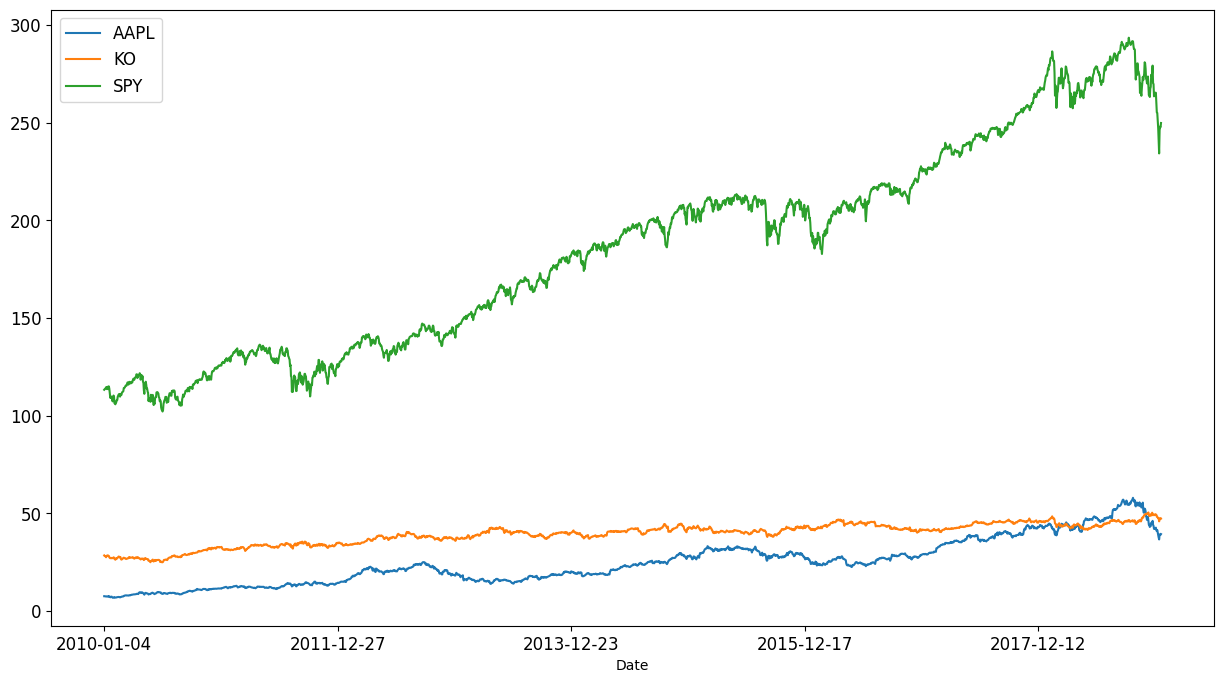

In [56]:
# Let's dipsplay graphic from the "close variable"
close.plot(figsize=(15,8), fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [57]:
# Let's get the first value from graphic
close.iloc[0, 0]

7.643214225769043

In [59]:
# Get AAPL all info from graphic
close.AAPL

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2018-12-24    36.707500
2018-12-26    39.292500
2018-12-27    39.037498
2018-12-28    39.057499
2018-12-31    39.435001
Name: AAPL, Length: 2264, dtype: float64

In [60]:
close.AAPL.div(close.iloc[0,0]) # Normalize this data from column of AAPL (divided)

Date
2010-01-04    1.000000
2010-01-05    1.001729
2010-01-06    0.985795
2010-01-07    0.983973
2010-01-08    0.990514
                ...   
2018-12-24    4.802626
2018-12-26    5.140835
2018-12-27    5.107471
2018-12-28    5.110088
2018-12-31    5.159479
Name: AAPL, Length: 2264, dtype: float64

In [61]:
close.AAPL.div(close.iloc[0,0]).mul(100) # Normalize, divide and multiple by 100

Date
2010-01-04    100.000000
2010-01-05    100.172893
2010-01-06     98.579511
2010-01-07     98.397266
2010-01-08     99.051443
                 ...    
2018-12-24    480.262614
2018-12-26    514.083452
2018-12-27    510.747145
2018-12-28    511.008821
2018-12-31    515.947875
Name: AAPL, Length: 2264, dtype: float64

In [62]:
close.iloc[0] # Get first columns value

AAPL      7.643214
KO       28.520000
SPY     113.330002
Name: 2010-01-04, dtype: float64